In [2]:
import os.path
from os import path
import pandas as pd

# 캐글 ↓제출경로
data_path = '/kaggle/input/kdt-ai-1/'
if not path.exists(data_path):
    data_path = './input/COVID_19_XRAY/'

train_path = data_path + 'train/'
test_path = data_path + 'test/'
valid_path = data_path + 'valid/'

from glob import glob

print(f'훈련 데이터 경로 : {train_path}')
print(f'테스트 데이터 경로 : {test_path}')
print(f'훈련 데이터 개수 : {len(glob(train_path + "*/*"))}')
print(f'테스트 데이터 개수 : {len(glob(test_path + "*.png"))}')

훈련 데이터 경로 : ./input/COVID_19_XRAY/train/
테스트 데이터 경로 : ./input/COVID_19_XRAY/test/
훈련 데이터 개수 : 2000
테스트 데이터 개수 : 400


In [3]:
# 이미지 출력
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import cv2

def show_image(img_paths, rows=1, cols=3):
    assert len(img_paths) <= rows*cols # 이미지가 행/열 갯수보다 많으면 오류 발생
    
    mpl.rc('font', size=5)
    plt.figure(figsize=(10,7))
    grid = gridspec.GridSpec(rows, cols) # 서브플롯 배치
    
    # 이미지 출력
    for idx, img_path in enumerate(img_paths):
        image = cv2.imread(img_path) # 이미지 파일읽기
        ax = plt.subplot(grid[idx])
        ax.imshow(image) # 이미지 출력


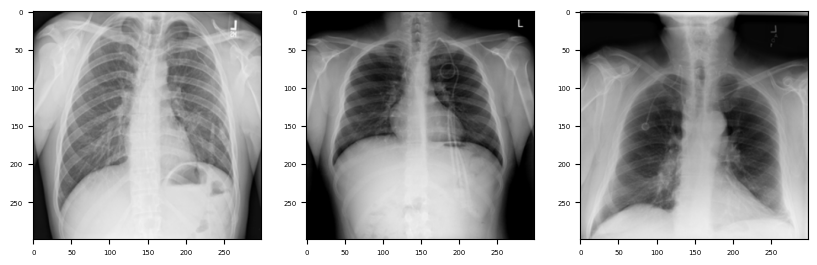

In [4]:
# 정상 엑스선 이미지 경로  
# 코로나 엑스선 이미지 경로
# 모아서 저장 
last_three_files = os.listdir(train_path+"normal")[-3:]
normal_img_paths = [os.path.join(train_path+"normal", file ) for file in last_three_files]

# 이미지 출력 (정상 엑스선 이미지 출력 )
show_image(normal_img_paths)


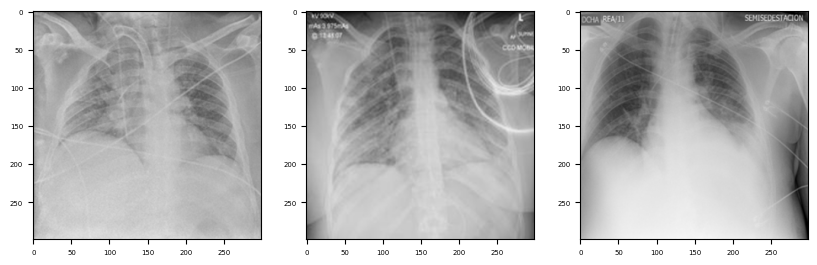

In [6]:
# 정상 엑스선 이미지 경로  
# 코로나 엑스선 이미지 경로
# 모아서 저장 
last_three_files = os.listdir(train_path+"covid")[-3:]
covid_img_paths = [os.path.join(train_path+"covid", file ) for file in last_three_files]

# 이미지 출력 (코로나 이미지 출력 )
show_image(covid_img_paths)

In [16]:
from PIL import Image
import numpy as np

# PNG 파일 열고 배열로 변환
img = Image.open(f"{train_path}/image_001.png")
arr = np.array(img)

# 배열의 shape 출력
print("배열의 shape:", arr.shape)

print("배열의 3,3 까지만 출력")
print(arr[:3,:3])

배열의 shape: (299, 299)
배열의 3,3 까지만 출력
[[23 23 23]
 [25 25 25]
 [26 26 26]]


In [20]:
arr_1 = np.array(img.convert('RGB'))
arr_1.shape
arr_1[:3,:3]

array([[[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       [[26, 26, 26],
        [26, 26, 26],
        [26, 26, 26]]], dtype=uint8)

In [21]:
arr_2 = np.stack((arr,)*3, axis=-1)
arr_2[:3,:3]

array([[[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       [[26, 26, 26],
        [26, 26, 26],
        [26, 26, 26]]], dtype=uint8)

In [ ]:

# 검증 데이터가 없으므로 훈련데이터에서 따로 추출하는게 좋을듯
# csv 가 아니기에 다루는 방식이 달라야함
# 훈련데이터가 적으니 , 성능점수 지나치게 신뢰 x 

# 베이스라인 모델 
    # 데이터 증강
    # 신경망 모델
    # 옵티마이저
    # 훈련 및 예측
# 성능 개성
    # 데이터 증강
    # 신경망 구조
    # 옵티마이저
    # 훈련 및 예측